In [236]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [271]:
X_false = np.arange(10)
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
np.random.seed(1)
train_test_split(X_false, test_size=0.5)

[array([3, 1, 7, 8, 5]), array([2, 9, 6, 4, 0])]

In [273]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [274]:
X_treino.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
394,1,24.00,3,0,2,16.7000
851,0,74.00,3,0,0,7.7750
373,0,22.00,1,0,0,135.6333
523,1,44.00,1,0,1,57.9792
78,0,0.83,2,0,2,29.0000


In [275]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 6), (446, 6), (445,), (446,))

In [340]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [279]:
p = model.predict(X_valid)

In [280]:
np.mean(y_valid == p)

0.7802690582959642

In [281]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

## Validação Cruzada Cross Validation

In [282]:
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [283]:
?KFold

In [284]:
from sklearn.model_selection import RepeatedKFold

In [285]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=rep)
for linhas_treino, linhas_valid in kf.split(X_false):
    print('Treino', linhas_treino)
    print('Valid', linhas_valid)
    print()

Treino [0 3 5 6 9]
Valid [1 2 4 7 8]

Treino [1 2 4 7 8]
Valid [0 3 5 6 9]

Treino [0 1 3 5 8]
Valid [2 4 6 7 9]

Treino [2 4 6 7 9]
Valid [0 1 3 5 8]

Treino [2 5 6 8 9]
Valid [0 1 3 4 7]

Treino [0 1 3 4 7]
Valid [2 5 6 8 9]

Treino [0 1 3 6 8]
Valid [2 4 5 7 9]

Treino [2 4 5 7 9]
Valid [0 1 3 6 8]

Treino [0 1 7 8 9]
Valid [2 3 4 5 6]

Treino [2 3 4 5 6]
Valid [0 1 7 8 9]

Treino [0 2 4 6 9]
Valid [1 3 5 7 8]

Treino [1 3 5 7 8]
Valid [0 2 4 6 9]

Treino [0 4 5 7 8]
Valid [1 2 3 6 9]

Treino [1 2 3 6 9]
Valid [0 4 5 7 8]

Treino [0 1 2 4 8]
Valid [3 5 6 7 9]

Treino [3 5 6 7 9]
Valid [0 1 2 4 8]

Treino [0 2 4 7 9]
Valid [1 3 5 6 8]

Treino [1 3 5 6 8]
Valid [0 2 4 7 9]

Treino [0 1 2 3 9]
Valid [4 5 6 7 8]

Treino [4 5 6 7 8]
Valid [0 1 2 3 9]



In [137]:
resultados = []
for rep in range(10):
    print ('Rep:', rep)
    kf = KFold(2 ,shuffle=True, random_state=rep)
    for linhas_treino, linhas_valid in kf.split(X):
        print('Treino', linhas_treino.shape[0])
        print('Valid', linhas_valid.shape[0])
        print()
    
        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        model.fit(X_treino, y_treino)
    
        p = model.predict(X_valid)
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print('ACC:', acc)
        print()
    
        #print(X_treino.head())
        #print()

Rep: 0
Treino 445
Valid 446

ACC: 0.7713004484304933

Treino 446
Valid 445

ACC: 0.7797752808988764

Rep: 1
Treino 445
Valid 446

ACC: 0.7443946188340808

Treino 446
Valid 445

ACC: 0.7955056179775281

Rep: 2
Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7887640449438202

Rep: 3
Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7573033707865169

Rep: 4
Treino 445
Valid 446

ACC: 0.7354260089686099

Treino 446
Valid 445

ACC: 0.7415730337078652

Rep: 5
Treino 445
Valid 446

ACC: 0.7219730941704036

Treino 446
Valid 445

ACC: 0.7056179775280899

Rep: 6
Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7303370786516854

Rep: 7
Treino 445
Valid 446

ACC: 0.7040358744394619

Treino 446
Valid 445

ACC: 0.7348314606741573

Rep: 8
Treino 445
Valid 446

ACC: 0.7488789237668162

Treino 446
Valid 445

ACC: 0.7887640449438202

Rep: 9
Treino 445
Valid 446

ACC: 0.7623318385650224

Treino 446
Valid 445

ACC: 0.78426966

In [139]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('ACC:', acc)
    print()
    
        #print(X_treino.head())
        #print()

Treino 445
Valid 446

ACC: 0.7511210762331838

Treino 446
Valid 445

ACC: 0.7617977528089888

Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7690582959641256

Treino 446
Valid 445

ACC: 0.7573033707865169

Treino 445
Valid 446

ACC: 0.7399103139013453

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7354260089686099

Treino 446
Valid 445

ACC: 0.797752808988764

Treino 445
Valid 446

ACC: 0.7690582959641256

Treino 446
Valid 445

ACC: 0.7640449438202247

Treino 445
Valid 446

ACC: 0.7757847533632287

Treino 446
Valid 445

ACC: 0.7573033707865169

Treino 445
Valid 446

ACC: 0.7556053811659192

Treino 446
Valid 445

ACC: 0.7640449438202247

Treino 445
Valid 446

ACC: 0.7443946188340808

Treino 446
Valid 445

ACC: 0.7595505617977528

Treino 445
Valid 446

ACC: 0.7533632286995515

Treino 446
Valid 445

ACC: 0.7640449438202247



In [251]:
resultados

[0.7869955156950673,
 0.7797752808988764,
 0.827354260089686,
 0.8179775280898877,
 0.7847533632286996,
 0.7842696629213484,
 0.8161434977578476,
 0.7842696629213484,
 0.8004484304932735,
 0.8,
 0.8183856502242153,
 0.802247191011236,
 0.8116591928251121,
 0.8067415730337079,
 0.820627802690583,
 0.7887640449438202,
 0.8385650224215246,
 0.8044943820224719,
 0.7982062780269058,
 0.8112359550561797]

In [252]:
np.mean(resultados)

0.8041457147175896

In [253]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/home/alestan/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

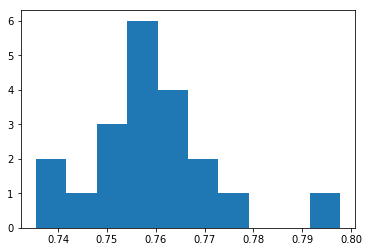

In [145]:
pylab.hist(resultados)

In [341]:
def transformar_sex(valor):
    if valor == 'female':
        return 1
    else:
        return 0
train['Sex_binario'] = train['Sex'].map(transformar_sex)

In [342]:
train['Sex_binario'] = train['Sex'].map(transformar_sex)
test['Sex_binario'] = test['Sex'].map(transformar_sex)

In [337]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [306]:
variables = ['Sex_binario', 'Age']

In [307]:
X = train[variables]
y = train['Survived']

In [308]:
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [309]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [325]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [326]:
X_prev = test[variables]
X_prev = X_prev.fillna(-1)

KeyError: "['Sex_binario'] not in index"

In [312]:
X = X.fillna(-1)

In [313]:
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [314]:
p = model.predict(X_prev)
p

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 2 

## Novas variáveis

modeloAnterior = 0.759601451100922

In [338]:
variables = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [339]:
X = train[variables].fillna(-1)
y = train['Survived']

In [317]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('ACC:', acc)
    print()
    
    #print(X_treino.head())
    #print()

Treino 445
Valid 446

ACC: 0.7869955156950673

Treino 446
Valid 445

ACC: 0.7797752808988764

Treino 445
Valid 446

ACC: 0.827354260089686

Treino 446
Valid 445

ACC: 0.8179775280898877

Treino 445
Valid 446

ACC: 0.7847533632286996

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8161434977578476

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8004484304932735

Treino 446
Valid 445

ACC: 0.8

Treino 445
Valid 446

ACC: 0.8183856502242153

Treino 446
Valid 445

ACC: 0.802247191011236

Treino 445
Valid 446

ACC: 0.8116591928251121

Treino 446
Valid 445

ACC: 0.8067415730337079

Treino 445
Valid 446

ACC: 0.820627802690583

Treino 446
Valid 445

ACC: 0.7887640449438202

Treino 445
Valid 446

ACC: 0.8385650224215246

Treino 446
Valid 445

ACC: 0.8044943820224719

Treino 445
Valid 446

ACC: 0.7982062780269058

Treino 446
Valid 445

ACC: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

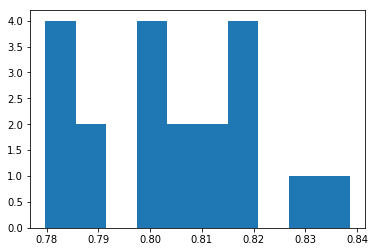

In [318]:
pylab.hist(resultados)

In [319]:
np.mean(resultados)

0.8041457147175896

# Retreinar o modelo

In [331]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [332]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [345]:
test[variables].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [346]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)
    
p = model.predict(test[variables].fillna(-1))

In [347]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Análise de erro

In [351]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('ACC:', acc)
    print()
    
    #print(X_treino.head())
    #print()

Treino 445
Valid 446

ACC: 0.7869955156950673

Treino 446
Valid 445

ACC: 0.7797752808988764

Treino 445
Valid 446

ACC: 0.827354260089686

Treino 446
Valid 445

ACC: 0.8179775280898877

Treino 445
Valid 446

ACC: 0.7847533632286996

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8161434977578476

Treino 446
Valid 445

ACC: 0.7842696629213484

Treino 445
Valid 446

ACC: 0.8004484304932735

Treino 446
Valid 445

ACC: 0.8

Treino 445
Valid 446

ACC: 0.8183856502242153

Treino 446
Valid 445

ACC: 0.802247191011236

Treino 445
Valid 446

ACC: 0.8116591928251121

Treino 446
Valid 445

ACC: 0.8067415730337079

Treino 445
Valid 446

ACC: 0.820627802690583

Treino 446
Valid 445

ACC: 0.7887640449438202

Treino 445
Valid 446

ACC: 0.8385650224215246

Treino 446
Valid 445

ACC: 0.8044943820224719

Treino 445
Valid 446

ACC: 0.7982062780269058

Treino 446
Valid 445

ACC: 0.8112359550561797



In [382]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,1,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,0,1,0


In [381]:
X_valid_check.shape

(445, 14)

In [380]:
errors = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
errors = errors[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
errors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [378]:
woman = errors[errors['Sex'] == 'female']
man = errors[errors['Sex'] == 'male']

In [379]:
woman.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [357]:
man.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


## Novas variaveis 

In [388]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train.['Embarked_Q'] = (train[Embarked] == 'S').astype(int)

train['Cabine_nula'] = (train['Cabin'].isnull()).astype(int)
train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)
train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [389]:
variables

['Sex_binario',
 'Age',
 'Pclass',
 'SibSp',
 'Parch',
 'Embarked_S',
 'Embarked_C',
 'Cabine_nula',
 'Nome_contem_Miss',
 'Nome_contem_Mrs',
 'Nome_contem_Master',
 'Nome_contem_Col',
 'Nome_contem_Major',
 'Nome_contem_Mr']

In [390]:
variables = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col','Nome_contem_Major','Nome_contem_Mr' ]
X = train[variables].fillna(-1)
y = train['Survived']

In [400]:
from sklearn.linear_model import LogisticRegression

In [407]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Valid', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    #model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model = LogisticRegression()
    model.fit(X_treino, y_treino)
    
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print('ACC:', acc)
    print()
    
    #print(X_treino.head())
    #print()

Treino 445
Valid 446

ACC: 0.8251121076233184

Treino 446
Valid 445

ACC: 0.8112359550561797

Treino 445
Valid 446

ACC: 0.8161434977578476

Treino 446
Valid 445

ACC: 0.8134831460674158

Treino 445
Valid 446

ACC: 0.8183856502242153

Treino 446
Valid 445

ACC: 0.8269662921348314

Treino 445
Valid 446

ACC: 0.8161434977578476

Treino 446
Valid 445

ACC: 0.8179775280898877

Treino 445
Valid 446

ACC: 0.8228699551569507

Treino 446
Valid 445

ACC: 0.8224719101123595

Treino 445
Valid 446

ACC: 0.8340807174887892

Treino 446
Valid 445

ACC: 0.8157303370786517

Treino 445
Valid 446

ACC: 0.8408071748878924

Treino 446
Valid 445

ACC: 0.8067415730337079

Treino 445
Valid 446

ACC: 0.8139013452914798

Treino 446
Valid 445

ACC: 0.8112359550561797

Treino 445
Valid 446

ACC: 0.8408071748878924

Treino 446
Valid 445

ACC: 0.8157303370786517

Treino 445
Valid 446

ACC: 0.8340807174887892

Treino 446
Valid 445

ACC: 0.8224719101123595



/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

((array([1., 3., 5., 2., 3., 2., 0., 0., 2., 2.]),
  array([0.80674157, 0.81014813, 0.81355469, 0.81696125, 0.82036781,
         0.82377437, 0.82718093, 0.83058749, 0.83399405, 0.83740061,
         0.84080717]),
  <a list of 10 Patch objects>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <a list of 10 Patch objects>))

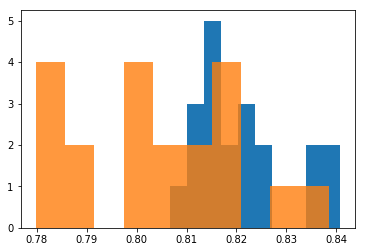

In [408]:
pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)

In [409]:
np.mean(resultados2)

0.8213188391192624

In [410]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#train.['Embarked_Q'] = (train[Embarked] == 'S').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)
test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)
test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

#model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model = LogisticRegression()
model.fit(X,y)

p = model.predict(test[variables].fillna(-1))

/home/alestan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## CRIAR SUBMISSION

In [411]:
sub = pd.Series(p, index=test['PassengerId'],name='Survived')
sub.shape

(418,)

In [412]:
sub.to_csv("model5.csv", header=True)

In [397]:
!head -n10 model4.csv

PassengerId,Survived
892,0
893,0
894,0
895,1
896,0
897,0
898,0
899,0
900,1
